In [69]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import probscale
#import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn import ensemble
from scipy import stats

%matplotlib inline

In [3]:
df = pd.read_csv("data/kc_house_data.csv")

In [13]:
df.shape
df.dtypes
df.corr()
df.columns
#number of columns, number of rows, types of data and raw correlations

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])
df['condition'] = df['condition'].astype(float)
#gets rid of odd characters and changes all datat types to flaots

In [20]:
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [21]:
df = df.fillna(0)
df.isna().sum()
# filling all the NaNs in with zeros for entire dataframe
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [27]:
df['has_basement1'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])
df['has_basement1'] = df['has_basement1'].astype(float)
df['has_basement'] = np.where(df['has_basement1']>0, 1, 0)
df = df.drop(columns=['has_basement1'])
df = df.drop(columns=['has_basementsqft'])
#creats a binary for if a property has a basement or does not

In [28]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


In [31]:
df_expensive = df.sort_values(by=['price'], ascending=True)
df_expensive

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,780,0.0,1942,0.0,98168,47.4739,-122.280,1700,10387,0
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0.0,0.0,...,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500,0
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0.0,0.0,...,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000,0
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250,0
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750,1
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,6200,3000.0,2001,0.0,98039,47.6289,-122.233,3560,24345,1
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730,1
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449,1


In [43]:
meanp = df_expensive['price'].mean()
minp = df_expensive['price'].min()
maxp = df_expensive['price'].max()
#df_expensive['price'].describe()
print('mean ', meanp, 'min ' , minp, 'max ', maxp)

mean  540296.5735055795 min  78000.0 max  7700000.0


In [45]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,0.003495
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.178264
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.158412
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.159863
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.201198
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,...,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034889
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,...,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.252465
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,...,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.039220
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,0.176905
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,...,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.130542


Text(0, 0.5, 'price')

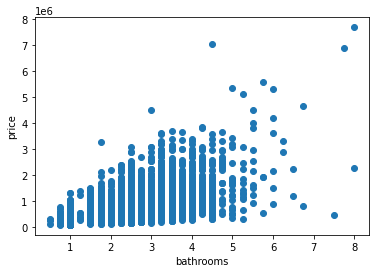

In [90]:
df.corr()['bathrooms']['price']
num_bathroom = df['bathrooms']
price = df['price']
fig, ax = plt.subplots()
ax.scatter(num_bathroom, price)
plt.xlabel('bathrooms')
plt.ylabel('price')
# graph that shows a positive correlation between price and bathrooms
#Find houses with low num of bathrooms

Text(0, 0.5, 'price')

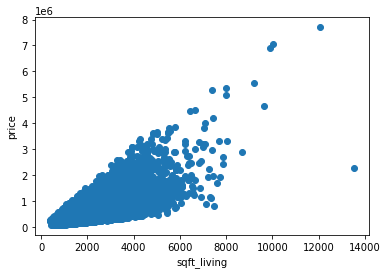

In [92]:
df.corr()['sqft_living']['price']
sqft_live = df['sqft_living']
price = df['price']
fig, ax = plt.subplots()
ax.scatter(sqft_live, price)
plt.xlabel('sqft_living')
plt.ylabel('price')
#graph that shows a positive correlation between price and square foot of living
#Find houses with lower squarefootage but with a higher average neighboring squarefootage

Text(0, 0.5, 'price')

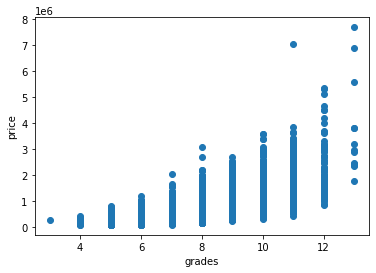

In [94]:
df.corr()['grade']['price']
grades = df['grade']
price = df['price']
fig, ax = plt.subplots()
ax.scatter(grades, price)
plt.xlabel('grades')
plt.ylabel('price')
#shows the positive correlation between price and grade
#Recommend high lot value/low building value for teardown

In [48]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()
#baseline regression model

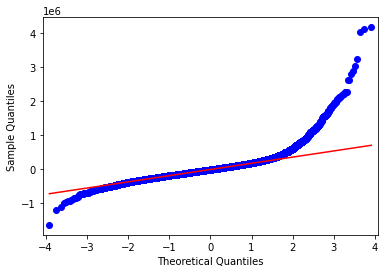

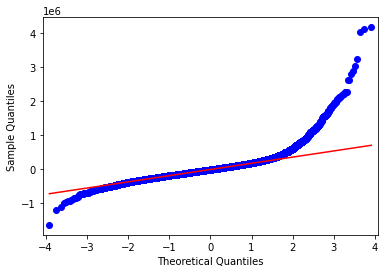

In [71]:
qqplot(pricekc_modtest.resid, line = 'q')

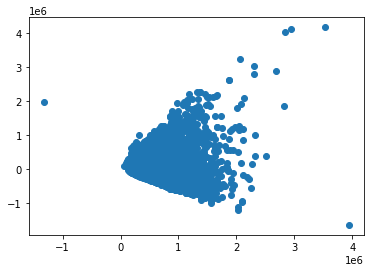

In [73]:
y =pricekc_modtest.resid
x = pricekc_modtest.predict(df[['bedrooms', 'sqft_living']])
fig, ax = plt.subplots()
ax.scatter(x,y)


In [100]:
df.iloc[x[x == x.min()].index]
#2402100895
#explanatory data analysis
#df.iloc[x[x == x.max()].index]
#df.iloc[y[y == y.max()].index]

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [119]:
i =df[(df.id == 2402100895)].index
df =df.drop(i)
# get index of outlier, drop outlier

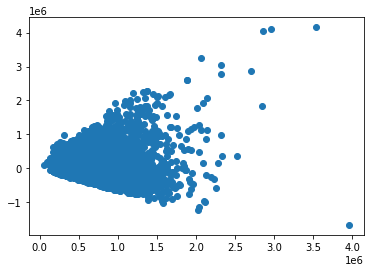

In [118]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()
y =pricekc_modtest.resid
x = pricekc_modtest.predict(df[['bedrooms', 'sqft_living']])
fig, ax = plt.subplots()
ax.scatter(x,y)
# replot scatter plot with dropped outlier for more normal distribution


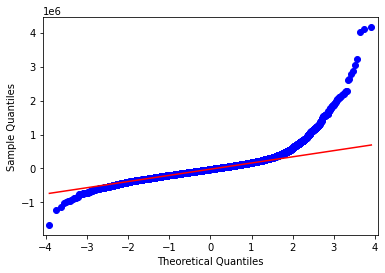

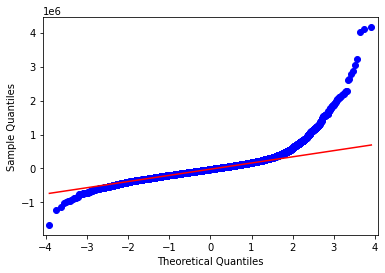

In [122]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()
qqplot(pricekc_modtest.resid, line = 'q')

In [49]:
pricekc_mod_summtest 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:50:36   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.091e+04   6638.826     12.187      0.000    6.79e+04    9.39e+04
bedrooms    -5.783e+04   2322.987    -24.896      0.000   -6.24e+04   -5.33e+04
sqft_living   314.6011      2.344    134.232      0.000     310.007     319.195
==============================================================================
Omnibus:                    14391.571   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488612.629
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.654   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

NameError: name 'probscale' is not defined